In [1]:
from anyBSM.plotting import ScanParameter, Plotting, setAnyStyle
import anyBSM.plotting as plotting
plotting.anyLogo = {'resize': False, 'show': False, 'alpha': 0.4, 'zorder': 0, 'loc': 'lower right'}
from anyBSM import anyBSM
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cmath, math
from matplotlib.ticker import MultipleLocator
mpl.rcParams['font.size']   = 18.0

## Initialise Y=0 triplet model with different renormalisation schemes

In [2]:
SM             = anyBSM('SM',       quiet=True, progress=False, scheme_name="OStadpoles")
TSM_OS         = anyBSM('TSM_Yeq0', quiet=True, progress=False, scheme_name="OStadpoles")
TSM_MS         = anyBSM('TSM_Yeq0', quiet=True, progress=False, scheme_name="MSOStadpoles")
TSM_OSFJ       = anyBSM('TSM_Yeq0', quiet=True, progress=False, scheme_name="OS")
TSM_MSFJ       = anyBSM('TSM_Yeq0', quiet=True, progress=False, scheme_name="MS")

# initialise plot objects for later use
plot_MS = Plotting(TSM_MS)
plot_OS = Plotting(TSM_OS)

## Check renormalisation scale dependence

#### OS scheme

In [3]:
TSM_OS.setparameters({'MHp': 500, 'LHT': 2})
TSM_OS.setparameters({'Qren': 170})
l1 = TSM_OS.lambdahhh()
TSM_OS.setparameters({'Qren': 1700})
l2 = TSM_OS.lambdahhh()
l1['total'] - l2['total']

(-1.1368683772161603e-13+0j)

#### $\overline{\text{MS}}$ scheme

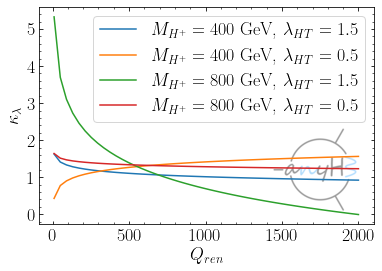

In [3]:
Qlin = ScanParameter(TSM_MS.parameters['Qren'], distribution='grid', start = 10, stop = 2000)

plot_MS.XY(Qlin,'kappalambda', 50, parameters = {'MHp': 400, 'LHT': 1.5}, label='$M_{H^+}= 400$ GeV, $\\lambda_{HT} = 1.5$')
plot_MS.XY(Qlin,'kappalambda', 50, parameters = {'MHp': 400, 'LHT': 0.5}, label='$M_{H^+}= 400$ GeV, $\\lambda_{HT} = 0.5$')
plot_MS.XY(Qlin,'kappalambda', 50, parameters = {'MHp': 800, 'LHT': 1.5}, label='$M_{H^+}= 800$ GeV, $\\lambda_{HT} = 1.5$')
plot_MS.XY(Qlin,'kappalambda', 50, parameters = {'MHp': 800, 'LHT': 0.5}, label='$M_{H^+}= 800$ GeV, $\\lambda_{HT} = 0.5$')

plt.legend()
plt.show()

## Comparison of renormalisation schemes (with OS tadpoles)

In [4]:
lambdahhh_SM_tree = np.real(SM.lambdahhh()['treelevel'])

MHpOS   = TSM_OS.parameters['MHp'].nvalue
MhOS    = TSM_OS.parameters['Mh1'].nvalue
MWOS    = TSM_OS.parameters['MWp'].nvalue
MZOS    = TSM_OS.parameters['MZ'].nvalue
MtOS    = TSM_OS.parameters['Mu3'].nvalue
vevOS   = TSM_OS.parameters['vvSM'].nvalue
aEWm1OS = TSM_OS.parameters['aEWM1'].nvalue
dalpha  = TSM_OS.parameters['Dalpha'].nvalue
CW      = MWOS/MZOS
SW      = np.sqrt(1 - CW**2)
g3      = cmath.sqrt(4*np.pi*TSM_OS.parameters['aS'].nvalue)

def mh2MS():
    return MhOS**2 - TSM_OS.Sigma('h1',momentum=MhOS**2)

def vevparamMS():
    PiAAnolight = TSM_OS.Sigmaprime('A',momentum=0,exclude_particles_pdg=TSM_OS.light_SM_fields)
    PiTAAlight  = TSM_OS.Sigma('A',momentum=MZOS**2,exclude_particles_pdg=TSM_OS.heavy_fields)
    PiTAZ       = TSM_OS.Sigma('Z','A',momentum=0)
    deltaEL     = 1/2*(dalpha+PiAAnolight+PiTAAlight.real/MZOS**2)+TSM_OS.getSignSinThetaW()*SW/CW*PiTAZ/MZOS**2
    return [cmath.sqrt(MWOS**2+TSM_OS.Sigma('Wp',momentum=MWOS**2).real).real, cmath.sqrt(MZOS**2+TSM_OS.Sigma('Z',momentum=MZOS**2).real).real, aEWm1OS/(1+2*deltaEL)]
 
def lamhhhos():
    res = TSM_OS.lambdahhh()['total']
    return np.real(res)

def lamhhhmsnoconv():
    TSM_MS.setparameters({'Mh1':MhOS,'MWp':MWOS,'MZ':MZOS,'aEWM1':aEWm1OS,'Mu3':MtOS})
    res = TSM_MS.lambdahhh()['total']
    return np.real(res)

def lamhhhmsconv():
    try:
        mhms = math.sqrt(mh2MS().real)
    except:
        return np.nan
    [mwms, mzms, aewm1ms] = vevparamMS()
    TSM_MS.setparameters({'Mh1':mhms,'MWp':mwms,'MZ':mzms,'aEWM1':aewm1ms,'Mu3':MtOS})
    res = TSM_MS.lambdahhh()['total']
    return np.real(res)

def calc_klam_OS(para = {}):
    TSM_OS.setparameters(para)
    return lamhhhos()/lambdahhh_SM_tree

def calc_klam_MS_noconv(para = {}):
    TSM_OS.setparameters(para)
    TSM_MS.setparameters(para)
    return lamhhhmsnoconv()/lambdahhh_SM_tree

def calc_klam_MS_conv(para = {}):
    TSM_OS.setparameters(para)
    TSM_MS.setparameters(para)
    return lamhhhmsconv()/lambdahhh_SM_tree

def calc_mh2_MS(para = {}):
    TSM_OS.setparameters(para)
    return mh2MS()


def calc_mHp2_MS(para = {}):
    TSM_OS.setparameters(para)
    return MHpOS**2 - TSM_OS.Sigma('Hp2',momentum=MHpOS**2)

In [5]:
[MhOS, vevOS]

[125.1, (250.69192876183072+0j)]

In [29]:
lamHT_range   = np.linspace(-4, 4, 100)

In [7]:
res_mh_MS_1 = [calc_mh2_MS({'MHp': 1000, 'LHT': lamHT, 'Qren': 'Mu3'})         for lamHT in lamHT_range]
res_mh_MS_2 = [calc_mh2_MS({'MHp': 1000, 'LHT': lamHT, 'Qren': '(MHp+Mu3)/2'}) for lamHT in lamHT_range]
res_mh_MS_3 = [calc_mh2_MS({'MHp': 1000, 'LHT': lamHT, 'Qren': 'MHp'})         for lamHT in lamHT_range]

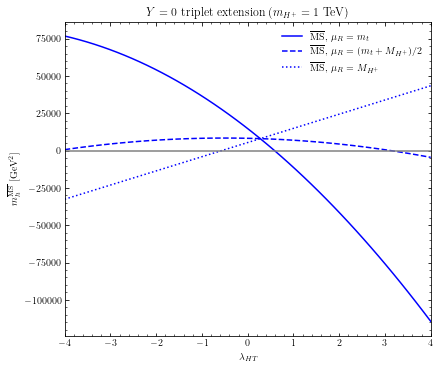

In [8]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(6,5))

plt.plot(lamHT_range, np.real(res_mh_MS_1), c='b',      ls='-',  label='$\overline{\\rm{MS}},\,\mu_R = m_t$')
plt.plot(lamHT_range, np.real(res_mh_MS_2), c='b',      ls='--', label='$\overline{\\rm{MS}},\,\mu_R = (m_t + M_{H^+})/2$')
plt.plot(lamHT_range, np.real(res_mh_MS_3), c='b',      ls=':', label='$\overline{\\rm{MS}},\,\mu_R = M_{H^+}$')

plt.hlines([0], -4, 4, color='gray')

plt.legend(frameon = False)
plt.title(r'$Y=0$ triplet extension ($m_{H^+} = 1$ TeV)')

plt.xlim([-4, 4])

plt.xlabel(r'$\lambda_{HT}$')
plt.ylabel(r'$m_h^{\overline{\rm{MS}}}$ [GeV$^2$]')

plt.show()

In [30]:
res_OS          = [       calc_klam_OS({'MHp': 1000, 'LHT': lamHT})                        for lamHT in lamHT_range]
res_MS_conv_1   = [  calc_klam_MS_conv({'MHp': 1000, 'LHT': lamHT, 'Qren': 'Mu3'})         for lamHT in lamHT_range]
res_MS_conv_2   = [  calc_klam_MS_conv({'MHp': 1000, 'LHT': lamHT, 'Qren': '(MHp+Mu3)/2'}) for lamHT in lamHT_range]
res_MS_conv_3   = [  calc_klam_MS_conv({'MHp': 1000, 'LHT': lamHT, 'Qren': 'MHp'})         for lamHT in lamHT_range]
# res_MS_conv_4   = [  calc_klam_MS_conv({'MHp': 1000, 'LHT': lamHT, 'Qren': 'sqrt(MHp*Mu3)'})         for lamHT in lamHT_range]

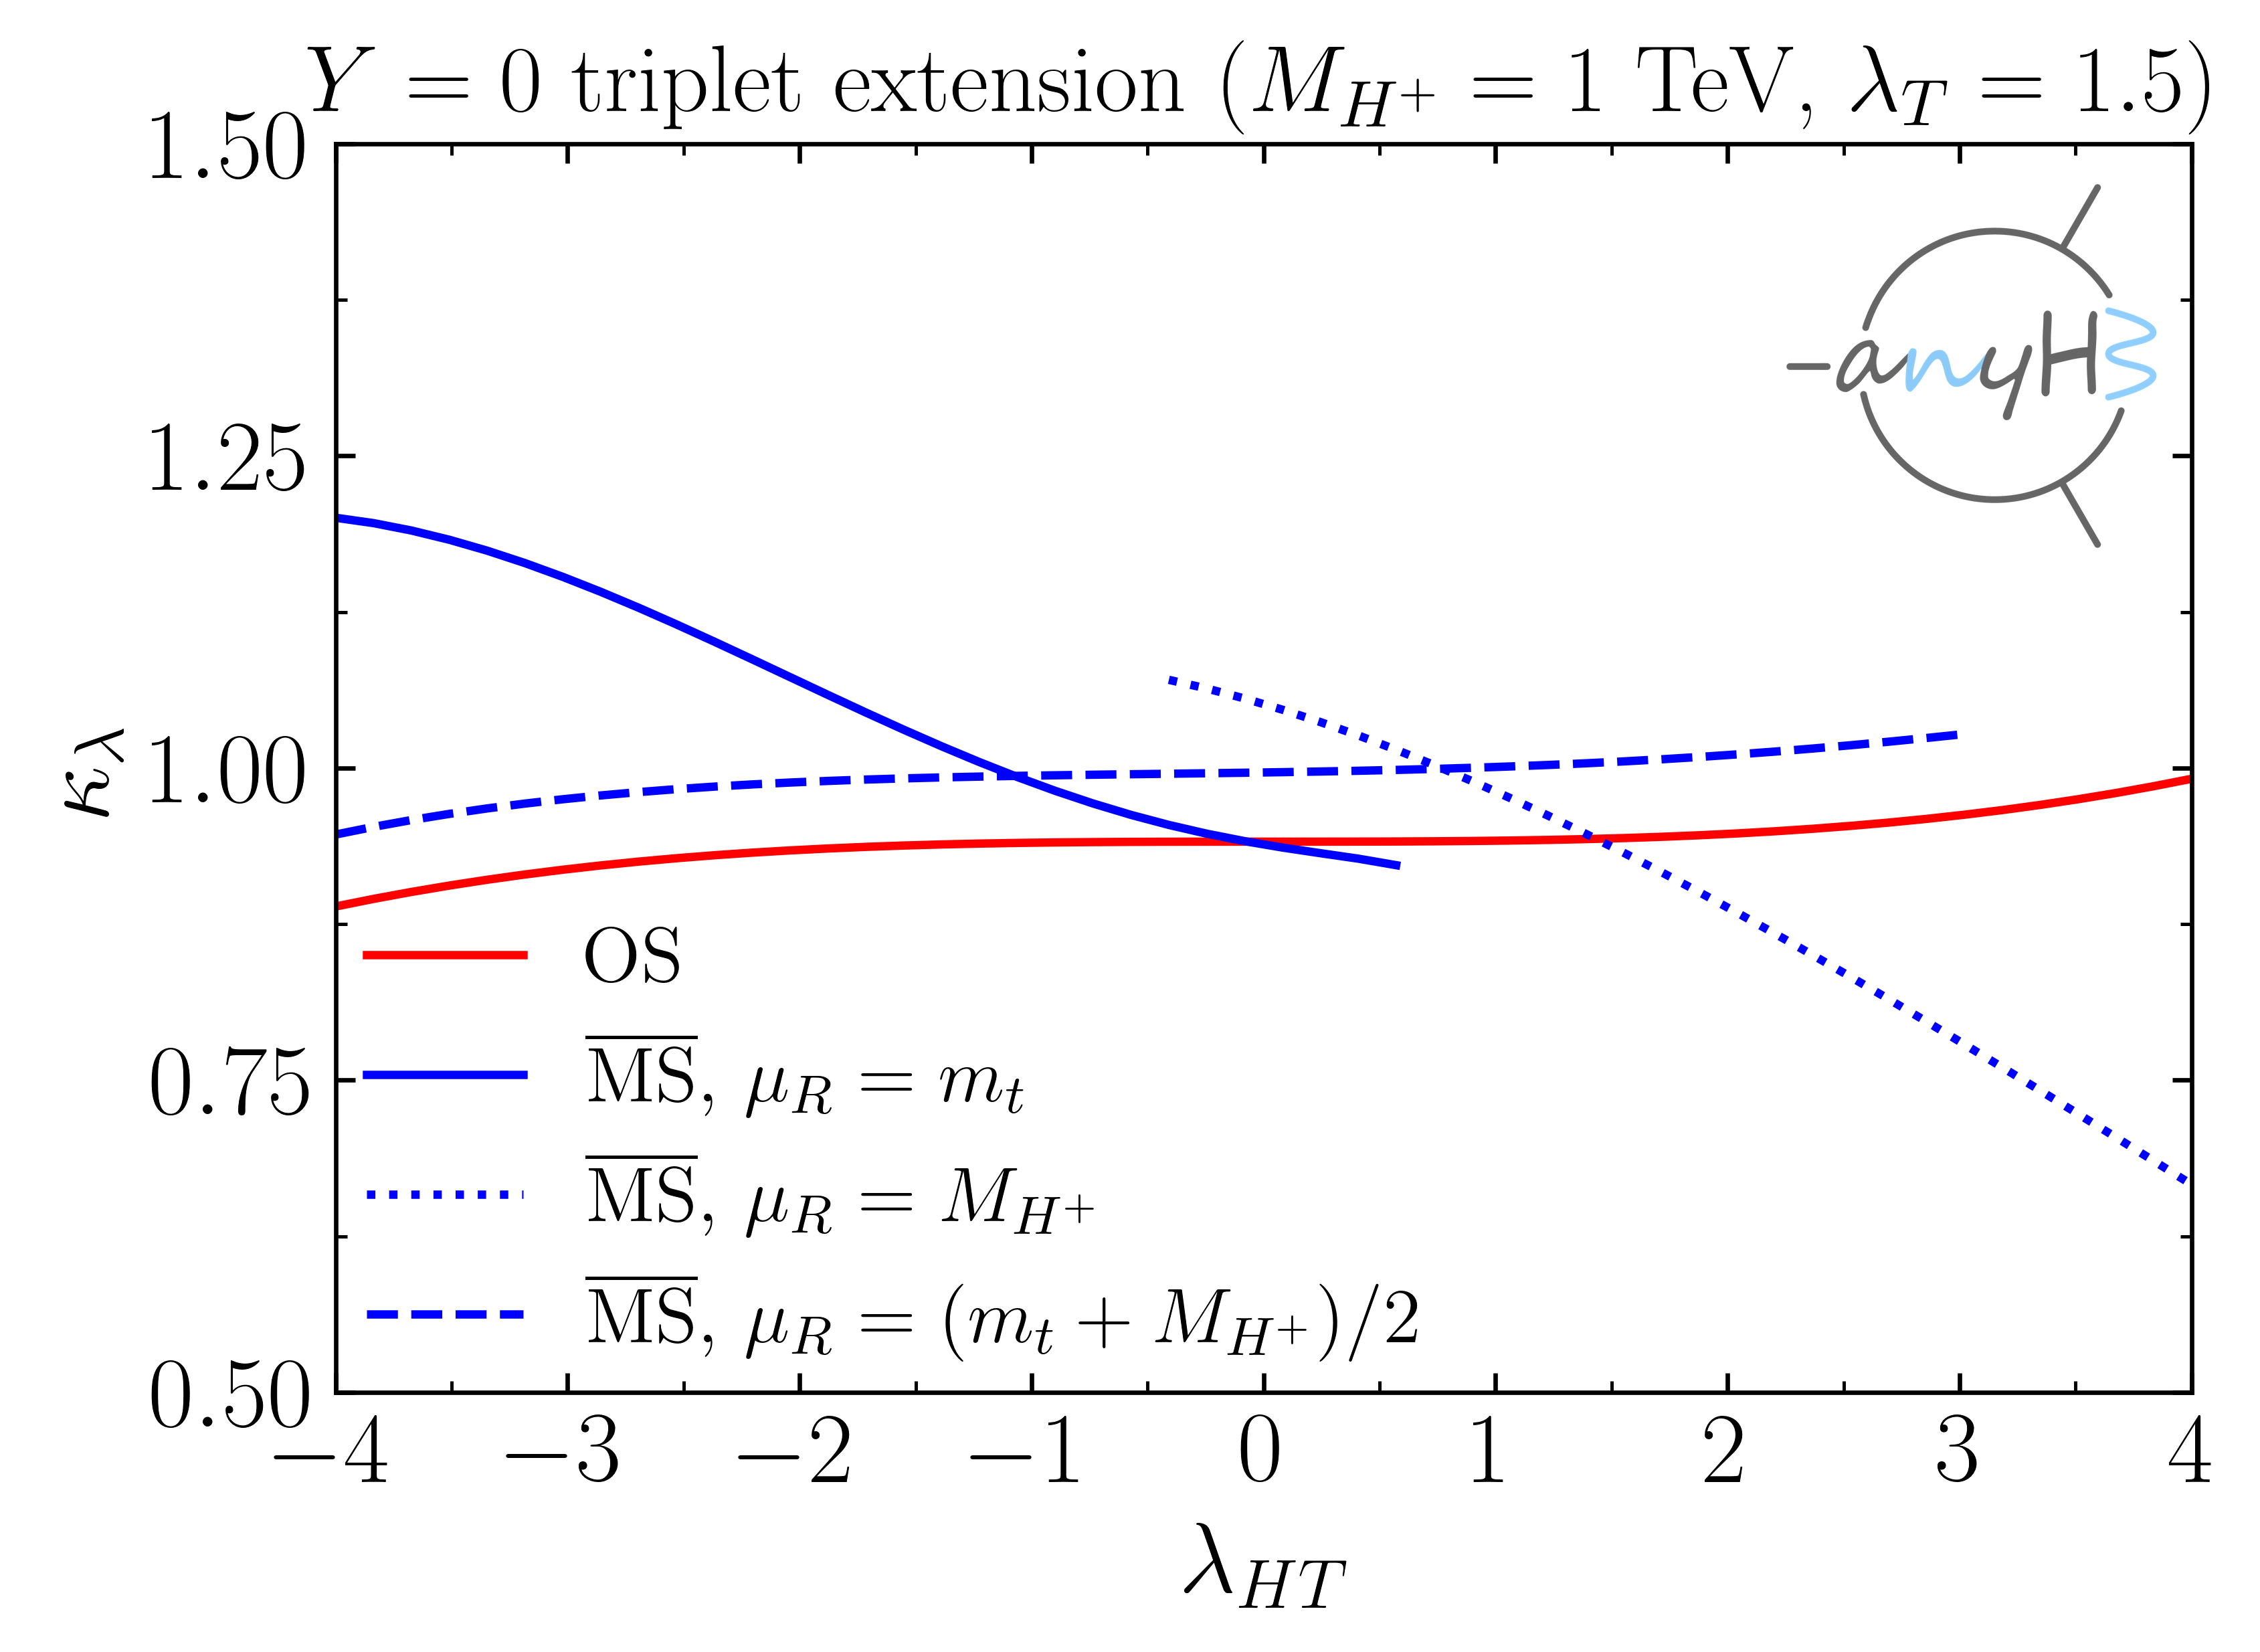

In [20]:
mpl.rcParams['font.size']   = 18.0
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5,4))
fig.dpi=600

plt.plot(lamHT_range,   res_OS,          c='r', ls='-',  label='OS')
plt.plot(lamHT_range, res_MS_conv_1,   c='b', ls='-',  label='$\overline{\\rm{MS}},\,\mu_R = m_t$')
plt.plot(lamHT_range, res_MS_conv_3,   c='b', ls=':',  label='$\overline{\\rm{MS}},\,\mu_R = M_{H^+}$')
plt.plot(lamHT_range, res_MS_conv_2,   c='b', ls='--', label='$\overline{\\rm{MS}},\,\mu_R = (m_t + M_{H^+})/2$')
# plt.plot(lamHT_range, res_MS_conv_4,   c='b', ls='-.', label='$\overline{\\rm{MS}},\,\mu_R = \sqrt{m_t M_{H^+}}$')

ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(.125))
ax.yaxis.set_major_locator(MultipleLocator(.25))

plt.legend(frameon = False,loc=(0,0.0),fontsize=14)
plt.title(r'$Y=0$ triplet extension ($M_{H^+} = 1$ TeV, $\lambda_T = 1.5$)', fontsize=17)

plt.xlim([-4, 4])
plt.ylim([0.5, 1.5])

plt.xlabel(r'$\lambda_{HT}$')
plt.ylabel(r'$\kappa_\lambda$')

plotting.place_logo(fig,0.8,0.67, resize=0.4, alpha=0.6, logo_name='anyH3_logo_large.png')
#plt.show()
plt.savefig('Yeq0_triplet_scheme_comparison_tOS.pdf',bbox_inches='tight',dpi=fig.dpi)

## Comparison of renormalisation schemes (with FJ tadpoles)

In [21]:
MHpOS   = TSM_OSFJ.parameters['MHp'].nvalue
MhOS    = TSM_OSFJ.parameters['Mh1'].nvalue
MWOS    = TSM_OSFJ.parameters['MWp'].nvalue
MZOS    = TSM_OSFJ.parameters['MZ'].nvalue
MtOS    = TSM_OSFJ.parameters['Mu3'].nvalue
vevOS   = TSM_OSFJ.parameters['vvSM'].nvalue
aEWm1OS = TSM_OSFJ.parameters['aEWM1'].nvalue
dalpha  = TSM_OSFJ.parameters['Dalpha'].nvalue
CW      = MWOS/MZOS
SW      = np.sqrt(1 - CW**2)
g3      = cmath.sqrt(4*np.pi*TSM_OSFJ.parameters['aS'].nvalue)

def mh2MSFJ():
    return MhOS**2 - TSM_OSFJ.Sigma('h1',momentum=MhOS**2)

def vevparamMSFJ():
    PiAAnolight = TSM_OSFJ.Sigmaprime('A',momentum=0,exclude_particles_pdg=TSM_OSFJ.light_SM_fields)
    PiTAAlight  = TSM_OSFJ.Sigma('A',momentum=MZOS**2,exclude_particles_pdg=TSM_OSFJ.heavy_fields)
    PiTAZ       = TSM_OSFJ.Sigma('Z','A',momentum=0)
    deltaEL     = 1/2*(dalpha+PiAAnolight+PiTAAlight.real/MZOS**2)+TSM_OSFJ.getSignSinThetaW()*SW/CW*PiTAZ/MZOS**2
    return [cmath.sqrt(MWOS**2+TSM_OSFJ.Sigma('Wp',momentum=MWOS**2).real).real, cmath.sqrt(MZOS**2+TSM_OSFJ.Sigma('Z',momentum=MZOS**2).real).real, aEWm1OS/(1+2*deltaEL)]
 
def lamhhhosFJ():
    res = TSM_OSFJ.lambdahhh()['total']
    return np.real(res)

def lamhhhmsnoconvFJ():
    TSM_MSFJ.setparameters({'Mh1':MhOS,'MWp':MWOS,'MZ':MZOS,'aEWM1':aEWm1OS,'Mu3':MtOS})
    res = TSM_MSFJ.lambdahhh()['total']
    return np.real(res)

def lamhhhmsconvFJ():
    try:
        mhms = math.sqrt(mh2MSFJ().real)
    except:
        return np.nan
    [mwms, mzms, aewm1ms] = vevparamMSFJ()
    TSM_MSFJ.setparameters({'Mh1':mhms,'MWp':mwms,'MZ':mzms,'aEWM1':aewm1ms,'Mu3':MtOS})
    res = TSM_MSFJ.lambdahhh()['total']
    return np.real(res)

def calc_klam_OSFJ(para = {}):
    TSM_OSFJ.setparameters(para)
    return lamhhhosFJ()/lambdahhh_SM_tree

def calc_klam_MS_noconvFJ(para = {}):
    TSM_OSFJ.setparameters(para)
    TSM_MSFJ.setparameters(para)
    return lamhhhmsnoconvFJ()/lambdahhh_SM_tree

def calc_klam_MS_convFJ(para = {}):
    TSM_OSFJ.setparameters(para)
    TSM_MSFJ.setparameters(para)
    return lamhhhmsconvFJ()/lambdahhh_SM_tree

def calc_mh2_MSFJ(para = {}):
    TSM_OSFJ.setparameters(para)
    return mh2MSFJ()

def calc_mHp2_MSFJ(para = {}):
    TSM_OSFJ.setparameters(para)
    return MHpOS**2 - TSM_OSFJ.Sigma('Hp2',momentum=MHpOS**2)

In [22]:
lamHT_range   = np.linspace(-4, 4, 100)

In [23]:
res_OSFJ          = [       calc_klam_OSFJ({'MHp': 1000, 'LHT': lamHT})                        for lamHT in lamHT_range]
res_MSFJ_conv_1   = [  calc_klam_MS_convFJ({'MHp': 1000, 'LHT': lamHT, 'Qren': 'Mu3'})         for lamHT in lamHT_range]
res_MSFJ_conv_2   = [  calc_klam_MS_convFJ({'MHp': 1000, 'LHT': lamHT, 'Qren': '(MHp+Mu3)/2'}) for lamHT in lamHT_range]
res_MSFJ_conv_3   = [  calc_klam_MS_convFJ({'MHp': 1000, 'LHT': lamHT, 'Qren': 'MHp'})         for lamHT in lamHT_range]

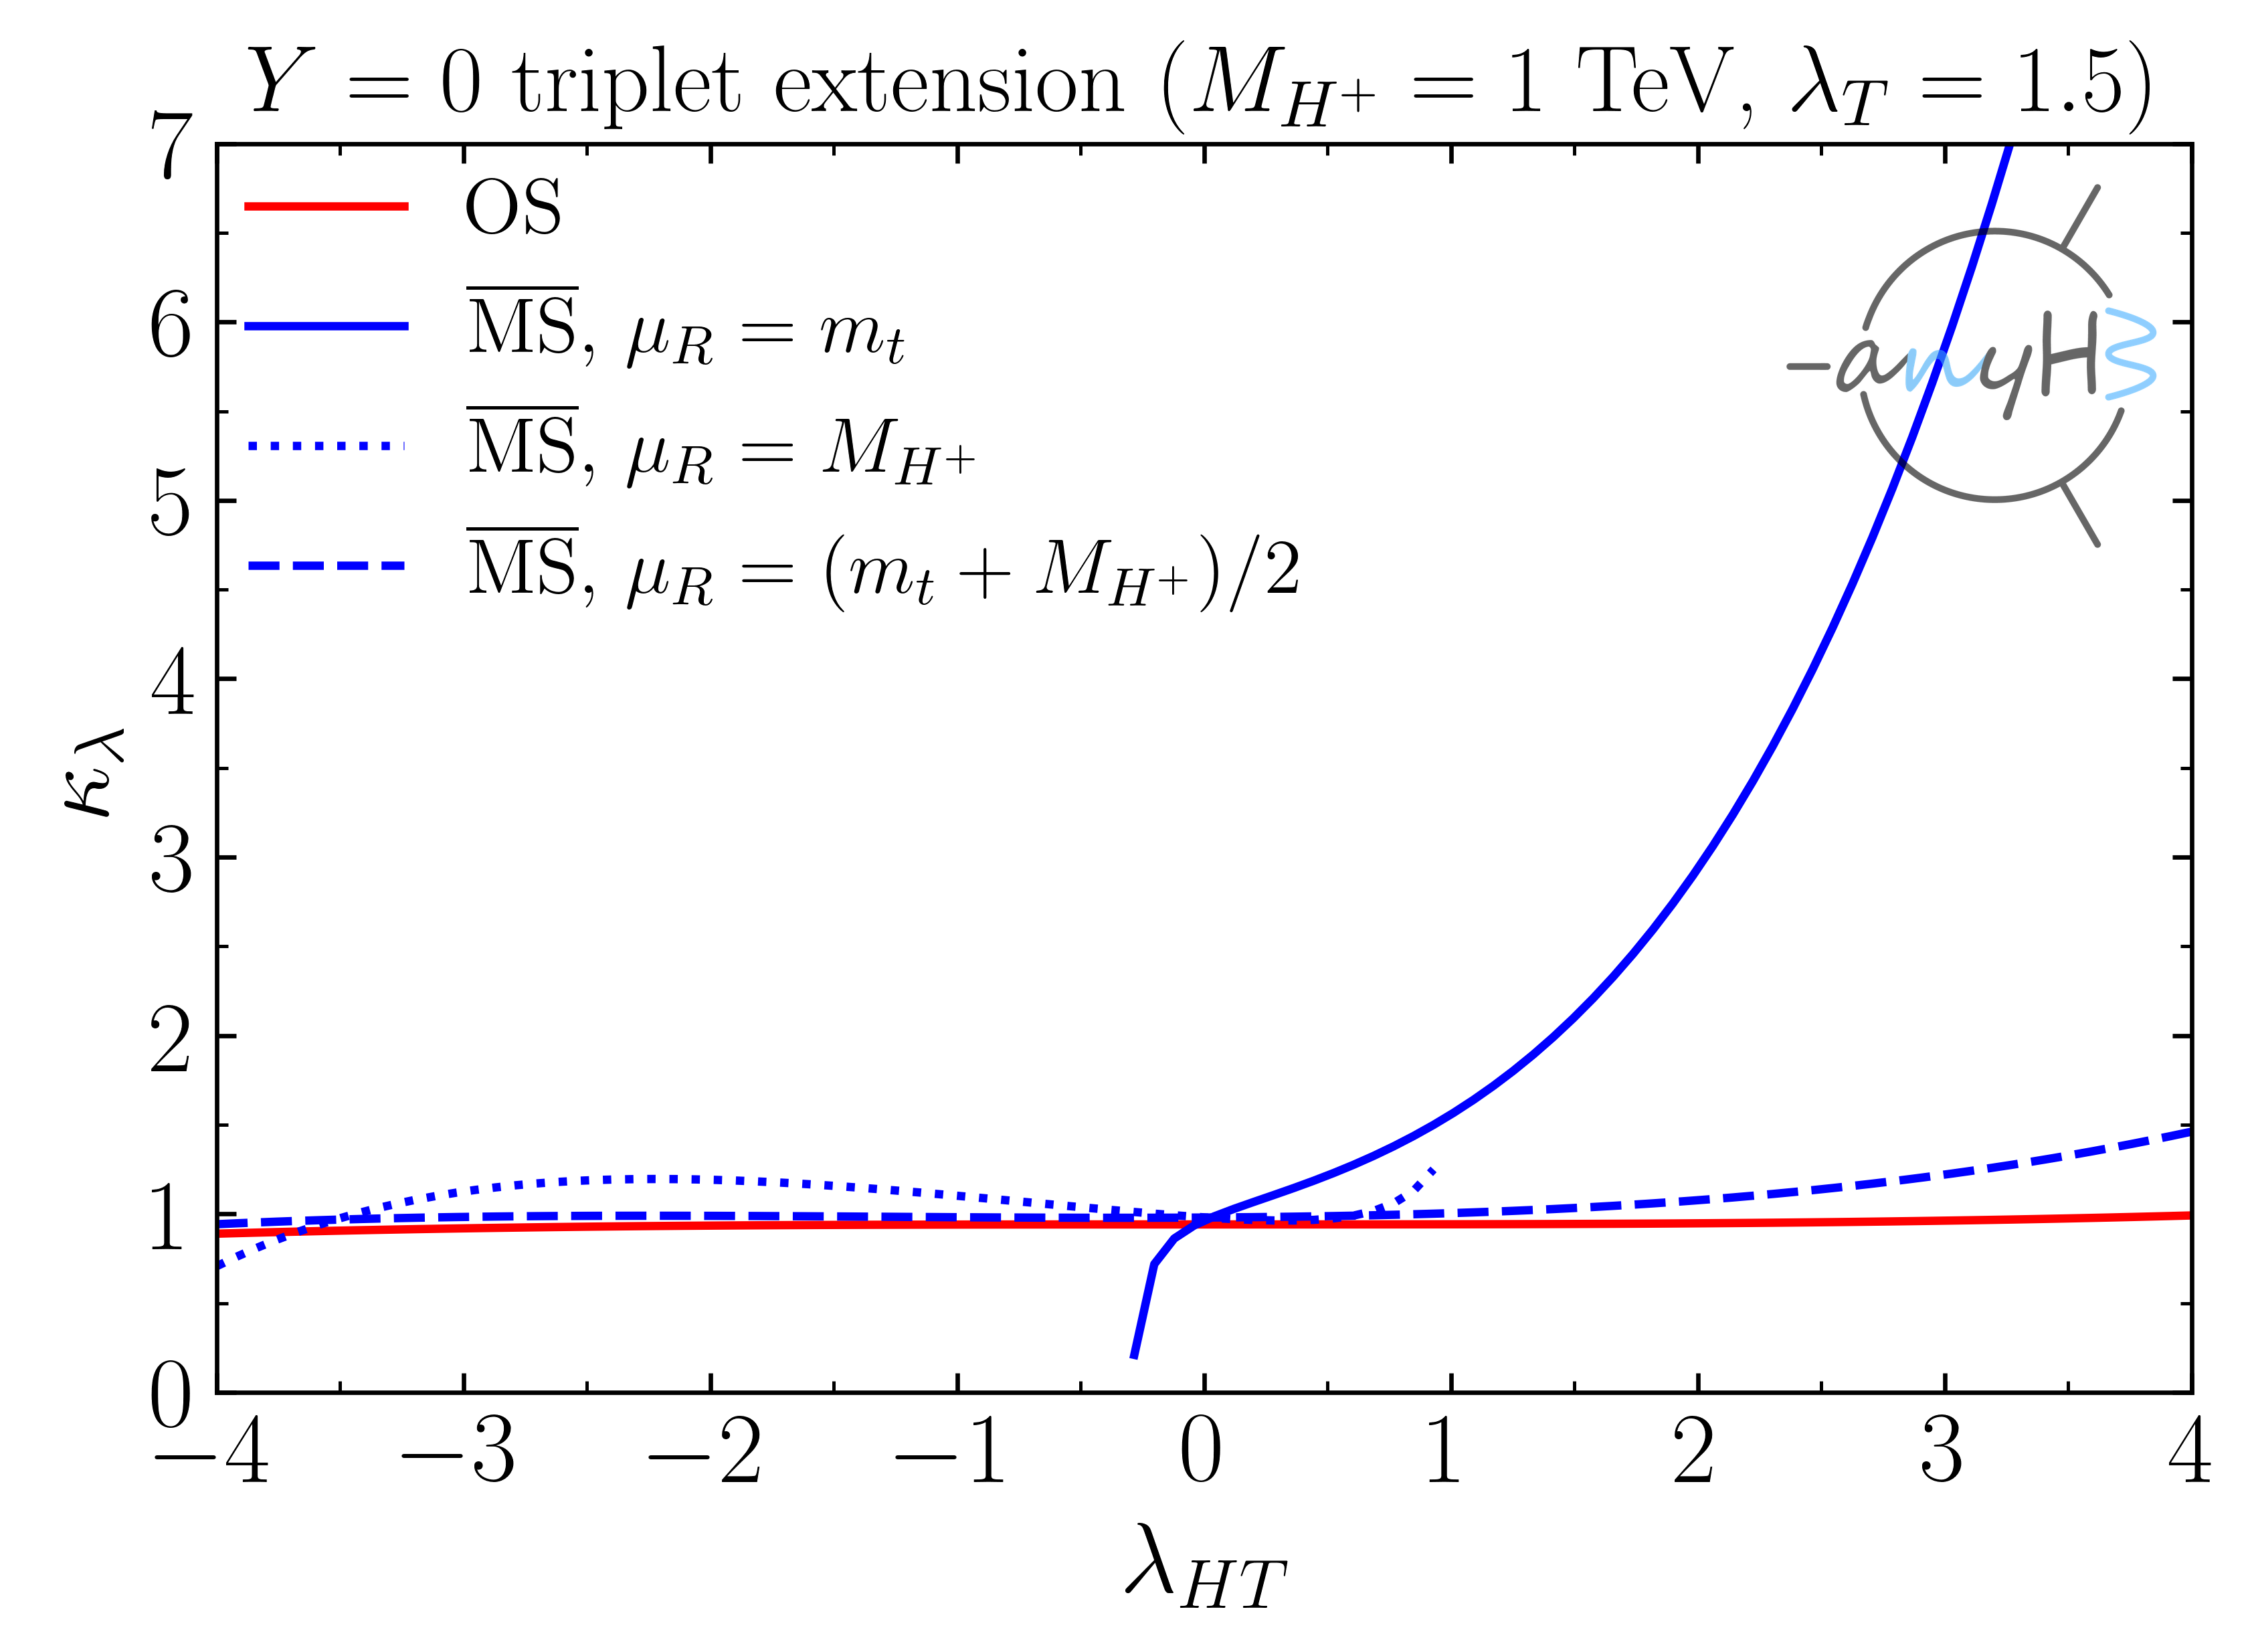

In [25]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5,4))
fig.dpi=600

plt.plot(lamHT_range,   res_OSFJ,          c='r', ls='-',  label='OS')
plt.plot(lamHT_range, res_MSFJ_conv_1,   c='b', ls='-',  label='$\overline{\\rm{MS}},\,\mu_R = m_t$')
plt.plot(lamHT_range, res_MSFJ_conv_3,   c='b', ls=':',  label='$\overline{\\rm{MS}},\,\mu_R = M_{H^+}$')
plt.plot(lamHT_range, res_MSFJ_conv_2,   c='b', ls='--', label='$\overline{\\rm{MS}},\,\mu_R = (m_t + M_{H^+})/2$')
# plt.plot(lamHT_range, res_MS_conv_4,   c='b', ls='-.', label='$\overline{\\rm{MS}},\,\mu_R = \sqrt{m_t M_{H^+}}$')

ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(.5))
ax.yaxis.set_major_locator(MultipleLocator(1))

plt.legend(frameon = False,loc=(0,0.6),fontsize=14)
plt.title(r'$Y=0$ triplet extension ($M_{H^+} = 1$ TeV, $\lambda_T = 1.5$)', fontsize=17)

plt.xlim([-4, 4])
plt.ylim([0, 7])

plt.xlabel(r'$\lambda_{HT}$')
plt.ylabel(r'$\kappa_\lambda$')

plotting.place_logo(fig,0.8,0.67, resize=0.4, alpha=0.6, logo_name='anyH3_logo_large.png')
#plt.show()
plt.savefig('Yeq0_triplet_scheme_comparison_FJ.pdf',bbox_inches='tight',dpi=fig.dpi)

## Conversion of the charged Higgs boson mass

In [26]:
# now also convert the Triplet mass and choose MHpOS=500 GeV
MHpOS=500
TSM_OS.warnSSSS=False
res_MHp_MS_1 = [calc_mHp2_MS({'MHp': MHpOS, 'LHT': lamHT, 'LT': 1.5, 'Qren': '(Mu3+MHp)/2'})  for lamHT in lamHT_range]
res_MHp_MS_2 = [calc_mHp2_MS({'MHp': MHpOS, 'LHT': lamHT, 'LT': 3,   'Qren': '(Mu3+MHp)/2'})  for lamHT in lamHT_range]
res_MHp_MS_3 = [calc_mHp2_MS({'MHp': MHpOS, 'LHT': lamHT, 'LT': 12,   'Qren': '(Mu3+MHp)/2'})  for lamHT in lamHT_range]

res_OS_MHpMS_1     = [calc_klam_OS({'MHp': cmath.sqrt(MHp.real), 'LT': 1.5, 'LHT': lamHT})  for lamHT,MHp in zip(lamHT_range,res_MHp_MS_1)]
res_OS_MHpMS_2     = [calc_klam_OS({'MHp': cmath.sqrt(MHp.real), 'LT': 3,  'LHT': lamHT})   for lamHT,MHp in zip(lamHT_range,res_MHp_MS_2)]
res_OS_MHpMS_3     = [calc_klam_OS({'MHp': cmath.sqrt(MHp.real), 'LT': 12,  'LHT': lamHT})  for lamHT,MHp in zip(lamHT_range,res_MHp_MS_3)]
# reset defaults 
TSM_OS.setparameters({'MHp': 1000})
MHpOS = 1000

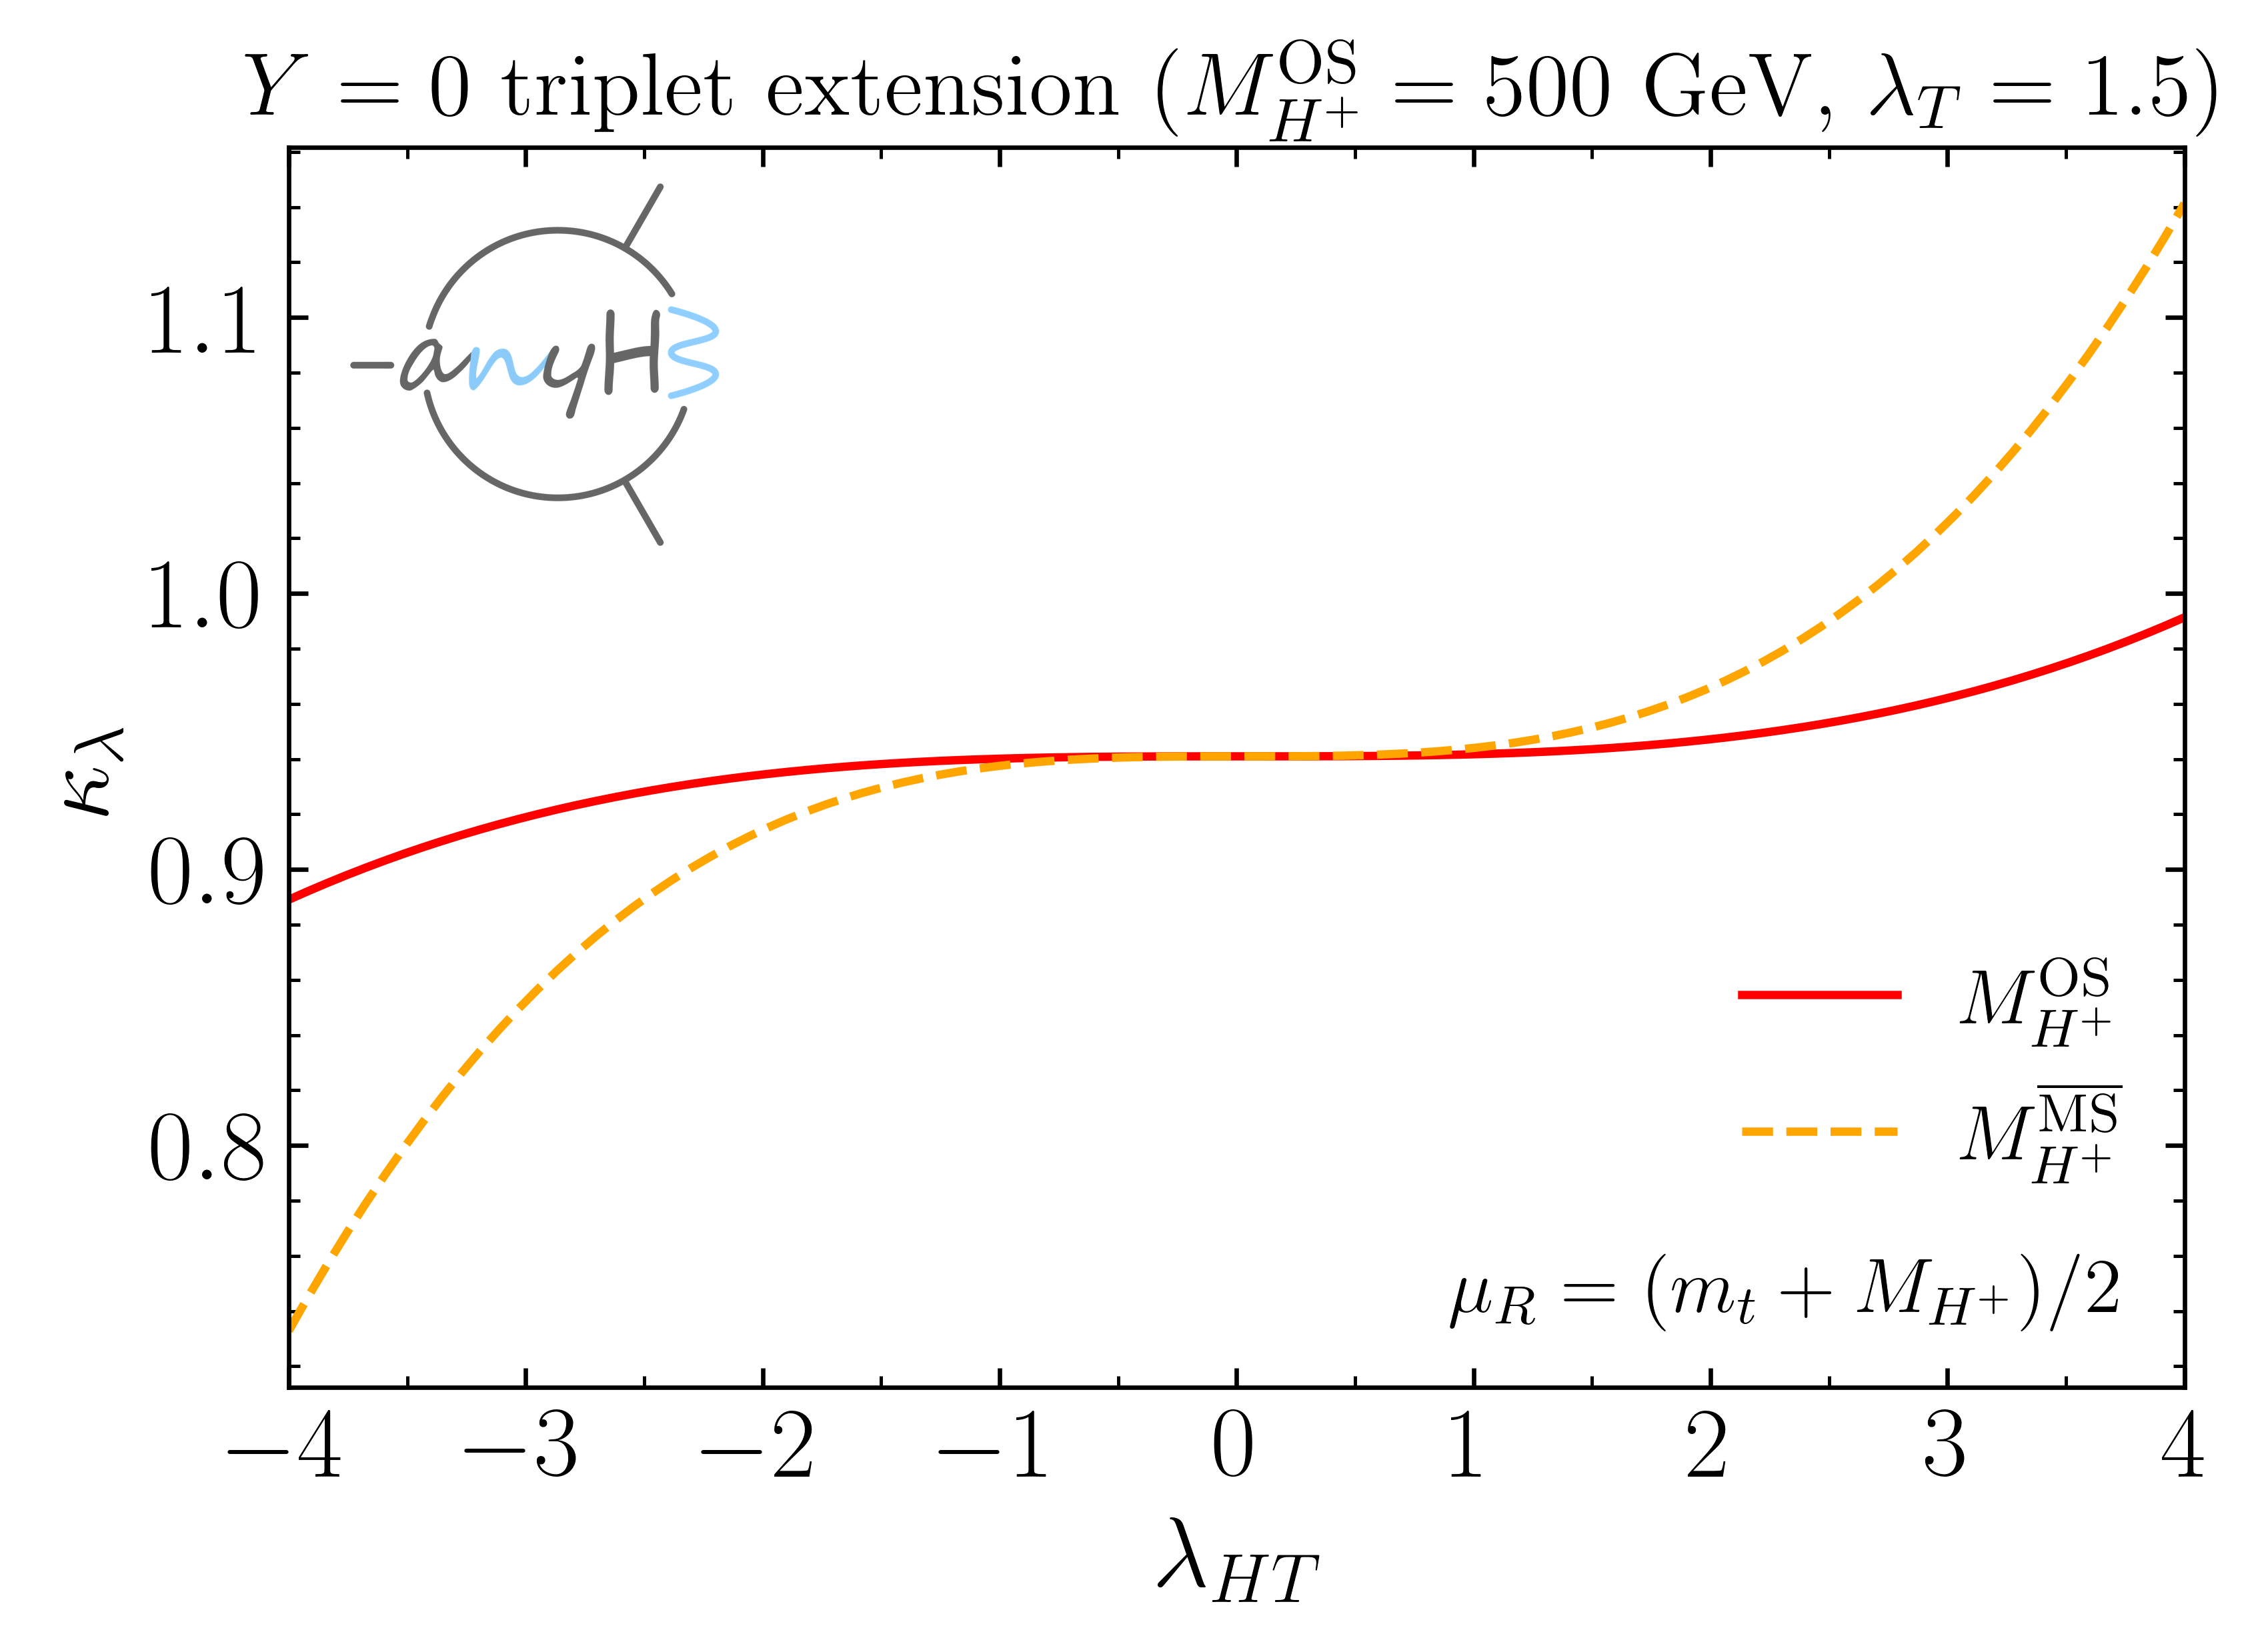

In [33]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(5.5,4))
fig.dpi=600

plt.plot(lamHT_range, res_OS,        c='r', ls='-',  label=r'$M_{H^+}^{\rm{OS}}$')
plt.plot(lamHT_range, res_OS_MHpMS_1,    c='orange', ls='--', label=r'$M_{H^+}^{\overline{\rm{MS}}}$')

plt.text(0.9,0.74,r'$\mu_R = (m_t + M_{H^+})/2$',fontsize='14')

ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.legend(frameon = False,loc=(0.75,0.14),fontsize=14)
plt.title(r'$Y=0$ triplet extension ($M_{H^+}^{\rm{OS}} = 500$ GeV, $\lambda_T=1.5$)', fontsize=16)

plt.xlim([-4, 4])

plt.xlabel(r'$\lambda_{HT}$')
plt.ylabel(r'$\kappa_\lambda$')

plotting.place_logo(fig,0.15,0.67, resize=0.4, alpha=0.6, logo_name='anyH3_logo_large.png')

#plt.show()
plt.savefig('Yeq0_triplet_scheme_comparison_tOS_MHpconv.pdf',bbox_inches='tight',dpi=fig.dpi)

# Scatter plot

In [34]:
LHT, MHp = np.meshgrid(np.linspace(-12, 12, 30), np.linspace(300, 1000, 30))

@np.vectorize
def lamhhh(LHT,MHp):
    res = TSM_OS.lambdahhh(parameters={'MHp': MHp, 'LHT': LHT, 'LT': 1.5})
    if TSM_OS.eigSSSS() > 0.5: # check for perturbative unitarity
        return None
    return res['total'].real/res['treelevel'].real

lam = lamhhh(LHT,MHp)

In [35]:
print(min([min(i) for i in lam]))
print(max([max(i) for i in lam]))

-14.478355629539156
16.206797018936033


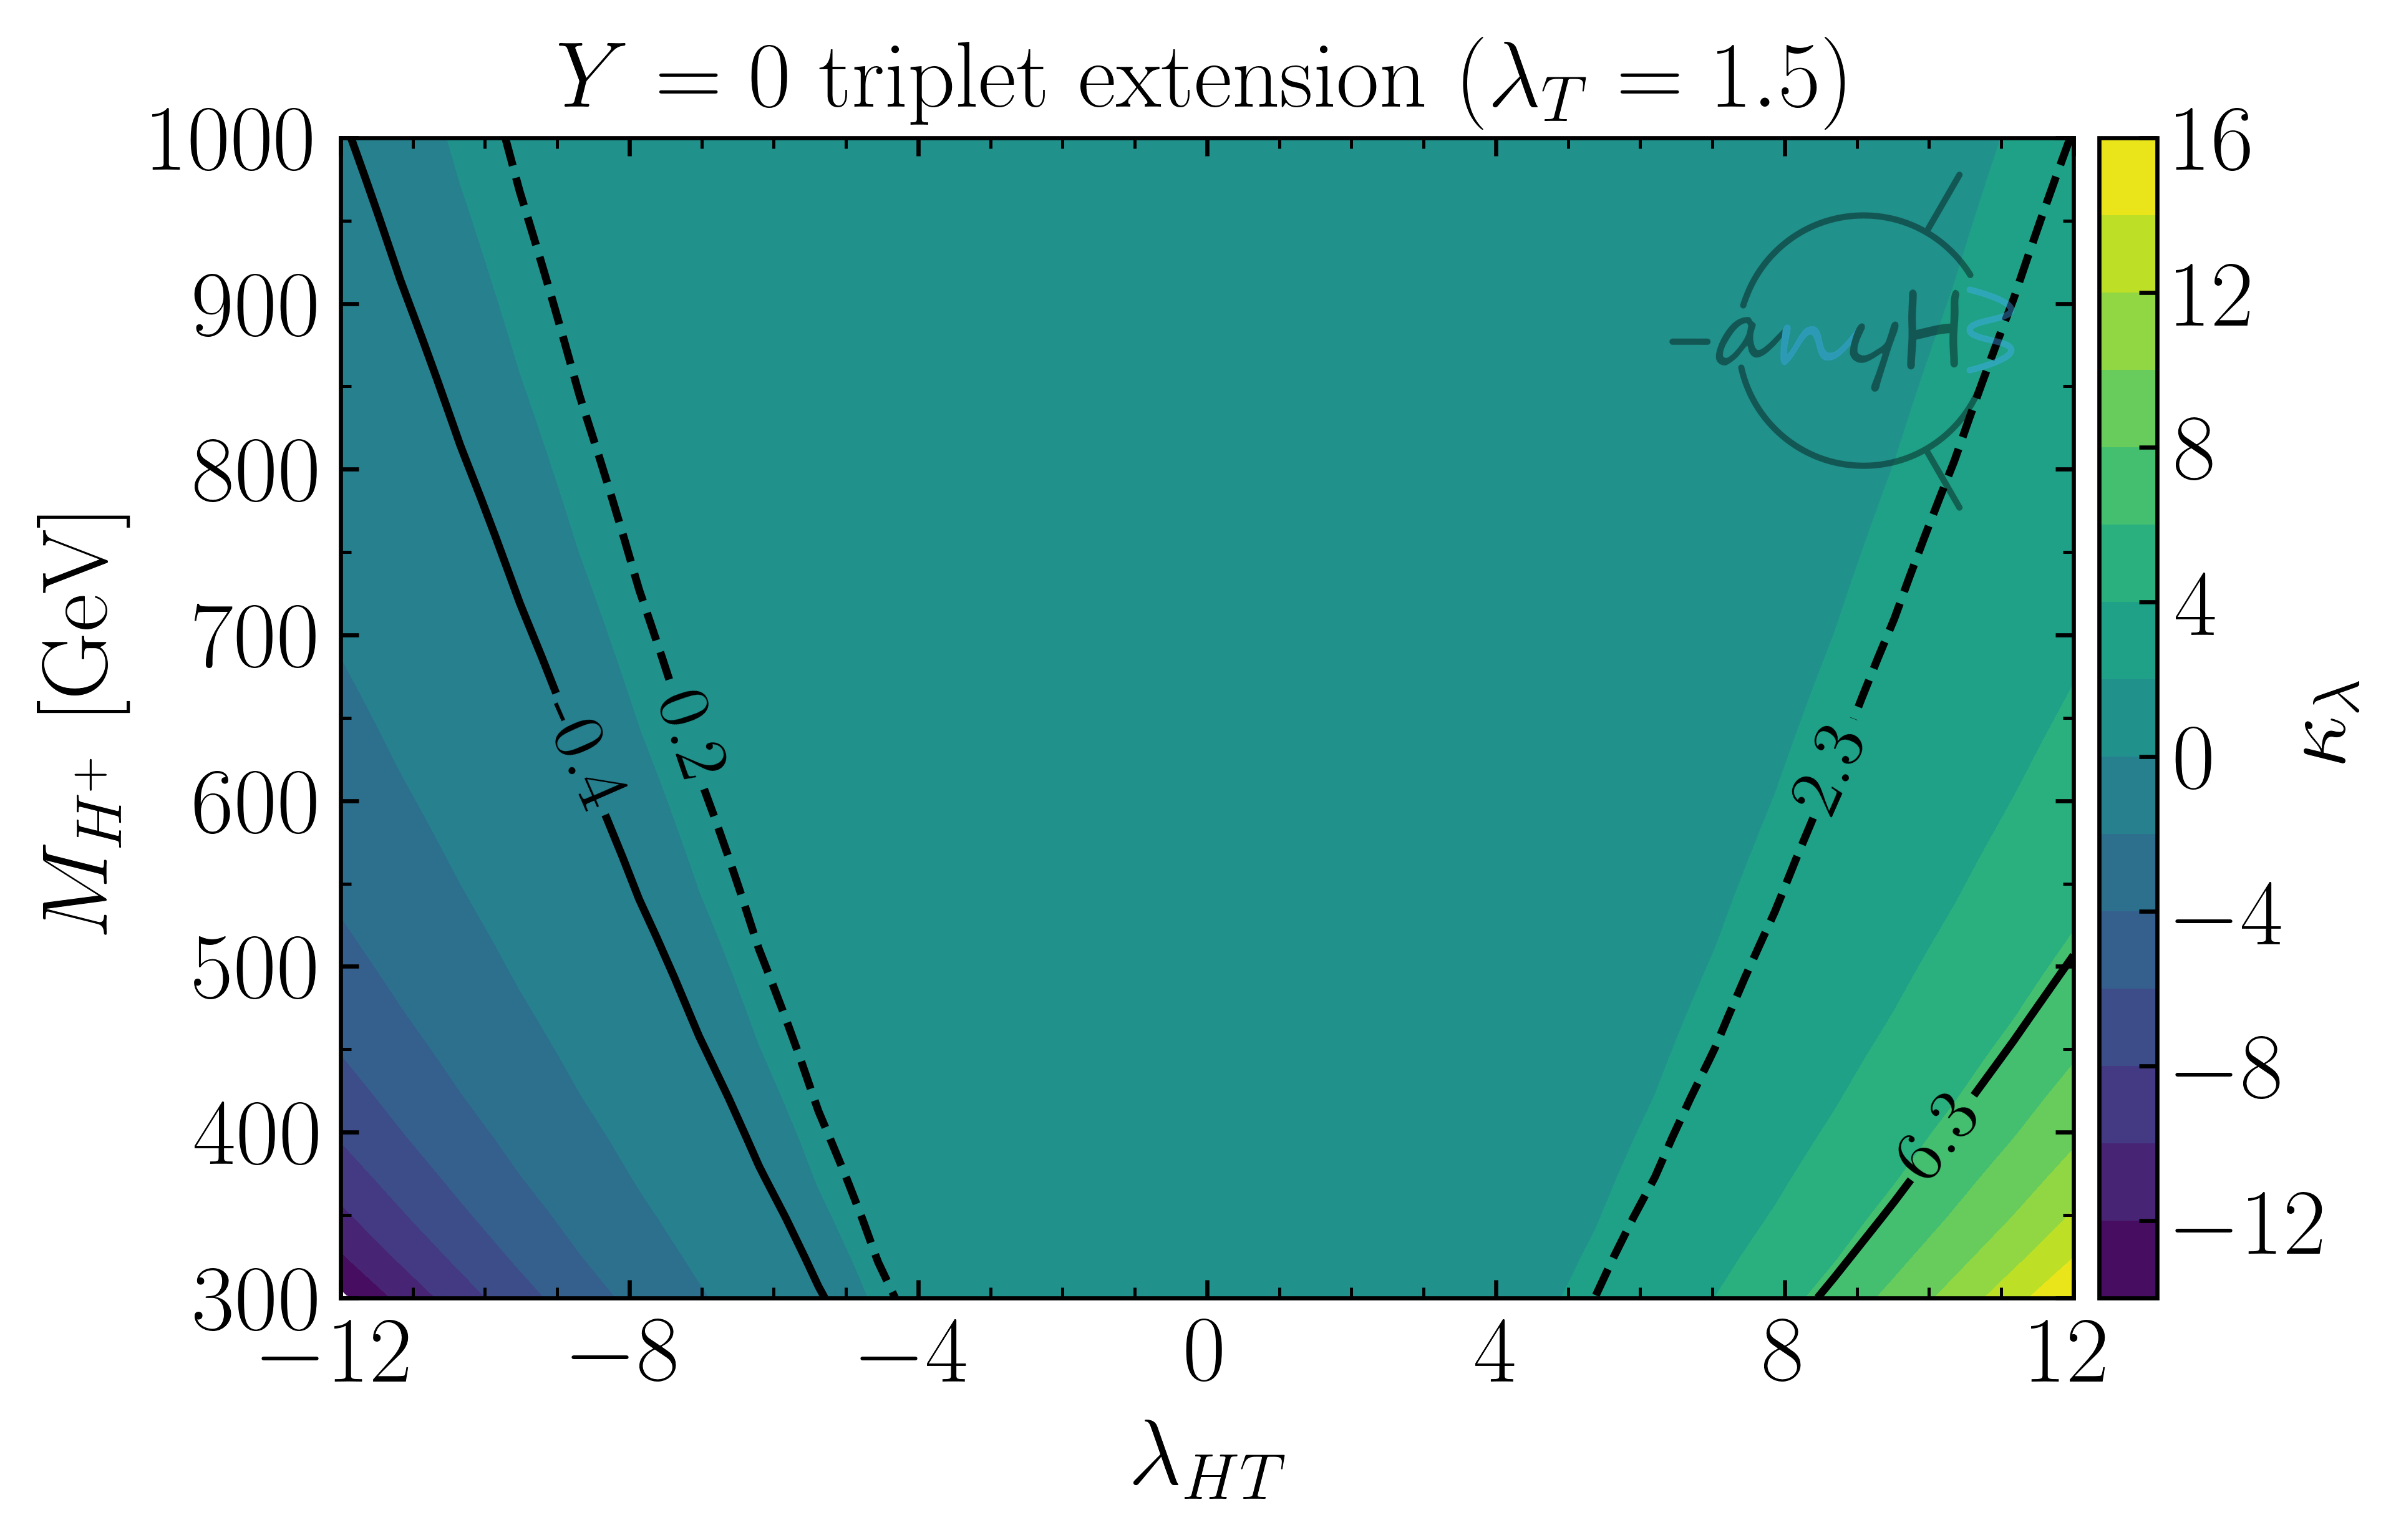

In [41]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(6.3,4))
fig.dpi=600

cf = ax.contourf(LHT, MHp, lam, levels = list(range(-14, 17, 2)))
c  = plt.contour(LHT, MHp, lam, levels = [-0.4, 0.2, 2.3, 6.3], colors='k', linestyles = ['solid','dashed','dashed','solid'])

ax.clabel(c, fontsize=14, inline_spacing=12, fmt='%1.1f')

ax.set_xlabel(r'$\lambda_{HT}$')
ax.set_ylabel(r'$M_{H^{+}}$ [GeV]')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(4))

ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(100))

cbar = fig.colorbar(cf, orientation = 'vertical', location = 'right', extend='min', pad =-0.01)
cbar.set_label('$\\kappa_\lambda$', labelpad=-10)

plt.title(r'$Y=0$ triplet extension ($\lambda_T = 1.5$)', fontsize=18)
plotting.place_logo(fig,0.7,0.67, resize=0.4, alpha=0.4, logo_name='anyH3_logo_large.png')

#plt.show()
plt.savefig('Yeq0_triplet_scatter.pdf',bbox_inches='tight',dpi=fig.dpi)